Working through the exercises from https://engmaths.github.io/semt30002/optim/week7.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Common functionality

# Calculate the gradient using central difference method
# We have a multivariate function, and we need to calculate the gradient with both sides fixed.
def grad(f, x, y, h=1e-5):
    # Calculate the gradient in the x direction
    dx = (f(x + h/2, y) - f(x - h/2, y)) / h
    # Calculate the gradient in the y direction
    dy = (f(x, y + h/2) - f(x, y - h/2)) / h
    return np.array([dx, dy])

def print_solution(f, c):
    print("\n ")
    print("========= Solution found =========")
    print(f"Solution: ({c[0]}, {c[1]})")
    print(f"Solution value: {f(*c)}")

def plot(f, title, x_lims, y_lims, cs=None, levels=100):
    x = np.linspace(*x_lims)
    y = np.linspace(*y_lims)
    X, Y = np.meshgrid(x, y)
    f_vals = f(X, Y)

    fig, ax = plt.subplots()
    cmap = ax.contour(X, Y, f_vals, levels=levels) # levels=[0.0001, 0.1, 1, 10, 100])

    if cs:
        ax.scatter(*cs[-1])
        ax.plot(*np.array(cs).T)

    ax.set_xlim(*x_lims)
    ax.set_ylim(*y_lims)
    ax.set_aspect('equal')
    
    fig.suptitle(title)
    fig.colorbar(cmap)

    return ax

# Exercise 1

![Exercise 1 description](images/exercise_1.png)

In [3]:
# Define function
def f(x, y):
    return 2*x**2 + 5*y**2 - 2*x*y - 2*x - 8*y

# Testing - different function
"""
def f(x, y):
    a = 1
    b = 2
    return (a - x)**2 + b*(y - x**2)**2
"""

'\ndef f(x, y):\n    a = 1\n    b = 2\n    return (a - x)**2 + b*(y - x**2)**2\n'

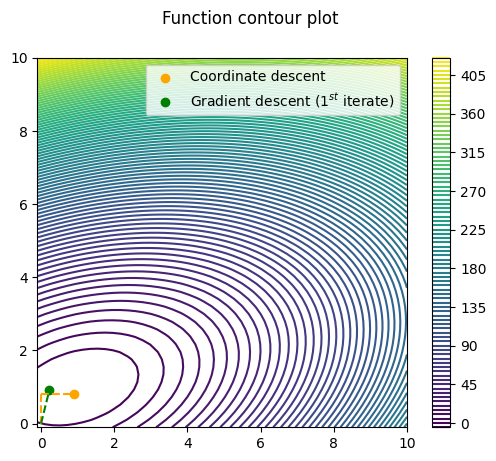

In [4]:
# 3 Plotting contour
# ==================

ax = plot(f, "Function contour plot", (-0.1, 10), (-0.1, 10))

# Answer from part 1
ax.scatter(0.9, 0.8, c='orange', label='Coordinate descent')
ax.plot([0, 0], [0, 0.8], ls='--', c='orange')
ax.plot([0, 0.9], [0.8, 0.8], ls='--', c='orange')

# Answer from part 2
sol_coords = (0.23, 0.92)
ax.scatter(*sol_coords, c='green', label='Gradient descent ($1^{st}$ iterate)')
ax.plot([0, sol_coords[0]], [0, sol_coords[1]], ls='--', c='green')

ax.legend()

..............................................................................................................................................................................................................................................................................................................

========= Solution found =========
Solution: (1.0019396796825812, 1.0005873253777584)
Solution value: -4.999993028976165


<Axes: >

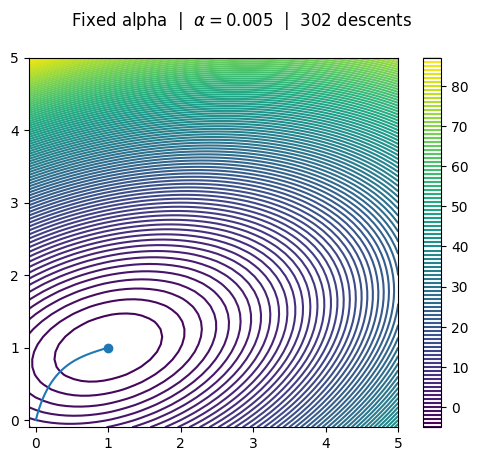

In [5]:
# 4.1 Fixed step size alpha
# =========================

# Params
# ======
# Termination condition based on gradient
grad_norm_threshold = 0.01
alpha = 0.005

# Start in a particular location
c = np.array([0, 0])    # c for coordinate
cs = [c]

# Iterate
#   Calculate the gradient
#   Solution deemed to be found if gradient is sufficiently shallow
while (grad_norm := np.linalg.norm(g := grad(f, *c))) >= grad_norm_threshold:
    print(".", end="") # print("New iterate")
    # Update coordinate of next iterate: take a step in the direction opposite to the gradient (by a fixed alpha)
    c = c - alpha*(g/grad_norm)
    cs.append(c)

print_solution(f, c)
x_lims = (-0.1, 5)
y_lims = (-0.1, 5)
title = f"Fixed alpha  |  $\\alpha = {alpha}$  |  {len(cs)-1} descents"
plot(f, title, x_lims, y_lims, cs)

.................................

========= Solution found =========
Solution: (1.0001145912505272, 0.9996215300090376)
Solution value: -4.9999991708013205


<Axes: >

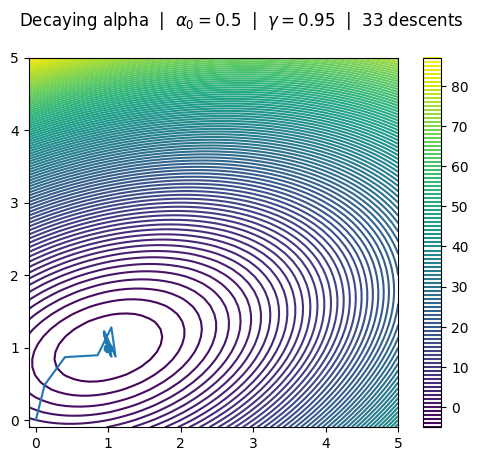

In [6]:
# 4.2 Decaying step size
# ======================

# Params
# ======
# Termination condition based on gradient
grad_norm_threshold = 0.01
# Much larger initial alpha permitted. Fixed alpha descent would never converge with an alpha of this size.
alpha0 = 0.5  # Keep for title of plot
alpha = alpha0
decaying_step_factor = 0.95

# Start in a particular location
c = np.array([0, 0])    # c for coordinate
cs = [c]

# Iterate
#   Calculate the gradient
#   Solution deemed to be found if gradient is sufficiently shallow
while (grad_norm := np.linalg.norm(g := grad(f, *c))) >= grad_norm_threshold:
    print(".", end="") # print("New iterate")
    # Update coordinate of next iterate: take a step in the direction opposite to the gradient (by a fixed alpha)
    c = c - alpha*(g/grad_norm)
    cs.append(c)
    # Reduce step size
    alpha *= decaying_step_factor

print_solution(f, c)
x_lims = (-0.1, 5)
y_lims = (-0.1, 5)
title = f"Decaying alpha  |  $\\alpha_0 = {alpha0}$  |  $\\gamma = {decaying_step_factor}$  |  {len(cs)-1} descents"
plot(f, title, x_lims, y_lims, cs)

......

========= Solution found =========
Solution: (1.0021213117629253, 1.000109130247175)
Solution value: -4.9999914035243105


<Axes: >

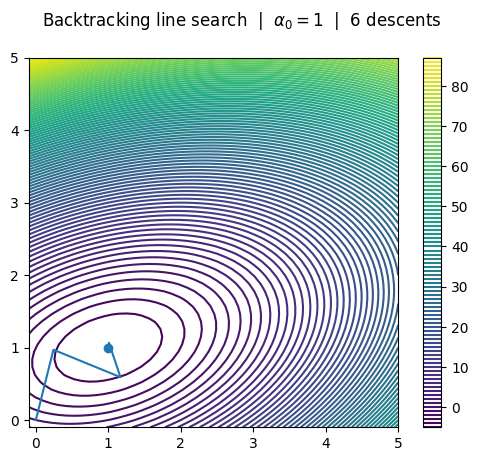

In [7]:
# 4.3 Backtracking line search
# ============================

# Params
# ======
# Termination condition based on gradient
grad_norm_threshold = 0.01
beta = 1e-4     # From textbook (Algorithms for Optimisation)
alpha0 = 1
step_reduction_factor = 0.5

# Start in a particular location
c = np.array([0, 0])    # c for coordinate
cs = [c]

# Iterate
#   Calculate the gradient
#   Solution deemed to be found if gradient is sufficiently shallow
while (grad_norm := np.linalg.norm(g := grad(f, *c))) >= grad_norm_threshold:
    print(".", end="") # print("New iterate")

    # Keep backtracking the alpha until it's below the line f(*c) - (beta*grad_norm)*alpha
    # TODO How to set/select the initial value of alpha for this?
    alpha = alpha0
    # The directional derivative in direction (vector) s is grad(f).s (dot product). So the
    #   directional derivative in the direction of the (unit normalised) gradient is 
    #   grad(f).(grad(f)/||grad(f)||) = ||grad(f)||^2 / ||grad(f)|| = ||grad(f)|| = grad_norm.
    # 'g/grad_norm' so that 'speed' along the line doesn't depend on the magnitude of the gradient
    #   (because ||g/grad_norm|| = 1)
    # f(*c) - (beta*grad_norm)*alpha is a straight line with gradient beta*grad_norm. When beta = 1,
    #   this line is tangent to the objective surface in the direction of the (approximate) line search.
    #   When beta = 0, this line is horizontal and any descent (decrease in the objective value) will
    #   be acceptable. 
    while f(*(c_line := c - alpha*(g/grad_norm))) >= f(*c) - (beta*grad_norm)*alpha:
        alpha *= step_reduction_factor
    
    # Once we get to here, we have found a valid alpha, hence a valid new iterate c.
    c = c_line
    cs.append(c)

print_solution(f, c)
x_lims = (-0.1, 5)
y_lims = (-0.1, 5)
title = f"Backtracking line search  |  $\\alpha_0 = {alpha0}$  |  {len(cs)-1} descents"
plot(f, title, x_lims, y_lims, cs)

.............................................................

Text(0.5, 0.98, 'Influence of varying $\\beta$')

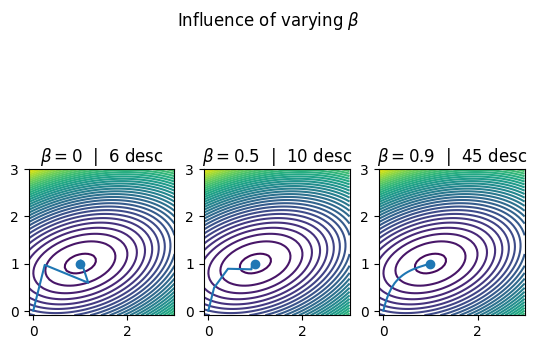

In [8]:
# Additional: backtracking line search, changing beta
# ===================================================
# See above code for comments

# Termination condition based on gradient
grad_norm_threshold = 0.01

def backtracking_line_search(f, c, beta=1e-4, alpha0=1, step_reduction_factor=0.5):
    cs = [c]

    # Iterate
    while (grad_norm := np.linalg.norm(g := grad(f, *c))) >= grad_norm_threshold:
        print(".", end="") # print("New iterate")

        # TODO How to set/select the initial value of alpha for this?
        alpha = alpha0
        while f(*(c_line := c - alpha*(g/grad_norm))) >= f(*c) - (beta*grad_norm)*alpha:
            alpha *= step_reduction_factor
        
        c = c_line
        cs.append(c)
    
    return cs

def populate_axis(ax, f, cs, beta, x_lims=(-0.1, 3), y_lims=(-0.1, 3), levels=40):
    x = np.linspace(*x_lims)
    y = np.linspace(*y_lims)
    X, Y = np.meshgrid(x, y)
    f_vals = f(X, Y)

    ax.contour(X, Y, f_vals, levels=levels) # levels=[0.0001, 0.1, 1, 10, 100])

    ax.scatter(*cs[-1])
    ax.plot(*np.array(cs).T)

    ax.set_xlim(*x_lims)
    ax.set_ylim(*y_lims)
    ax.set_aspect('equal')

    ax.set_title(fr"$\beta = {beta}$  |  {len(cs)-1} desc")

cs_b0 = backtracking_line_search(f, np.array([0, 0]), 0)
cs_b05 = backtracking_line_search(f, np.array([0, 0]), 0.5)
cs_b09 = backtracking_line_search(f, np.array([0, 0]), 0.9)

fig, axs = plt.subplots(ncols=3)
populate_axis(axs[0], f, cs_b0, 0)
populate_axis(axs[1], f, cs_b05, 0.5)
populate_axis(axs[2], f, cs_b09, 0.9)
fig.suptitle(r"Influence of varying $\beta$")

.........

========= Solution found =========
Solution: (0.9986590204657378, 1.0005016153448723)
Solution value: -4.999993800146183


<Axes: >

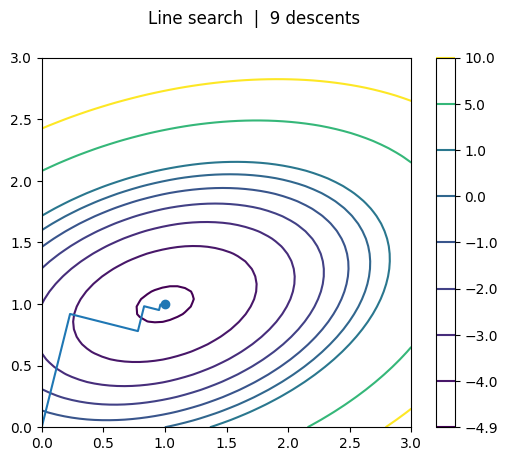

In [9]:
# Additional: line search
# =======================

# I misinterpreted the brief so we're not actually meant to do a line search example here!

# First the gradient vector is found (direction of greatest increase/decrease), and then the minimum
# point of the function is found along this direction (going downhill), with this point used as the
# location for the next iterate.

# This method uses a very simple (and quite daft) method for finding the minimum point along the line -
# the algorithm just progresses along the line, checking the gradient at each point, and declaring the
# minimum found when the gradient is close to zero. This works for the simple function given, but more
# advanced algorithms should be used in general for finding the minima of 1D functions - see Chapter 3
# of the Algorithms for Optimisation book.

# Params
# ======
# Termination condition based on gradient
grad_norm_threshold = 0.01
zero_line_deriv_threshold = 0.001

# 1. Provide starting location
c = np.array([0, 0])    # c for coordinate
cs = [c]

# 2. Iteratively compute
# Terminate when gradient is close to zero (minima reached)
while (g_norm := np.linalg.norm(g := grad(f, *c))) >= grad_norm_threshold:
    print(".", end="") # print("New iterate")

    # Find minima in the direction of the gradient
    alpha = 0
    grad_norm = g/g_norm    # Normalise gradient
    # c_line(alpha) is a position along the line of the gradient vector
    # grad(f, *c_line) . grad_norm is the directional derivative of f at the point c_line in the direction of g (the gradient vector at c).
    # I.e. it is the 1D gradient in the direction of the line - we are searching for the value (alpha) along the line at which this
    # becomes zero.
    while (grad_line := np.dot(grad(f, *(c_line := c - alpha*grad_norm)), grad_norm)) >= zero_line_deriv_threshold:
        alpha += 1e-3
    
    # When this is reached, we have found the minima along the line.
    c = c_line
    cs.append(c)

print_solution(f, cs[-1])
plot(f, f"Line search  |  {len(cs)-1} descents", (0, 3), (0, 3), cs, levels=[-4.9, -4, -3, -2, -1, 0, 1, 5, 10])
